Connected to base (Python 3.12.7)

Team stats loaded: (25360, 16)
Player stats loaded: (7659, 2)
Shots data loaded: (324543, 11)
Unique shot results: ['BlockedShot' 'MissedShots' 'SavedShot' 'OwnGoal' 'Goal' 'ShotOnPost']
Unique last actions: ['Standard' 'Pass' 'Tackle' 'BallRecovery' nan 'Cross' 'Chipped' 'Rebound'
 'Aerial' 'Dispossessed' 'Throughball' 'HeadPass' 'TakeOn' 'LayOff'
 'BallTouch' 'Interception' 'Foul' 'Save' 'BlockedPass' 'Challenge' 'End'
 'Goal' 'Clearance' 'CornerAwarded' 'GoodSkill' 'OffsidePass' 'Error'
 'KeeperSweeper' 'Card' 'SubstitutionOn' 'PenaltyFaced' 'Start' 'Punch'
 'ShieldBallOpp' 'OffsideProvoked' 'CrossNotClaimed' 'FormationChange'
 'KeeperPickup' 'ChanceMissed' 'Smother' 'SubstitutionOff']
Total goals found: 34498
Goal situations:
 situation
OpenPlay          24457
FromCorner         4029
Penalty            3078
SetPiece           2066
DirectFreekick      868
Name: count, dtype: int64
Direct Freekick goals: 868
Shot types in FK goals:
 shotType
RightFoot    537
LeftFoot     331
Name: co

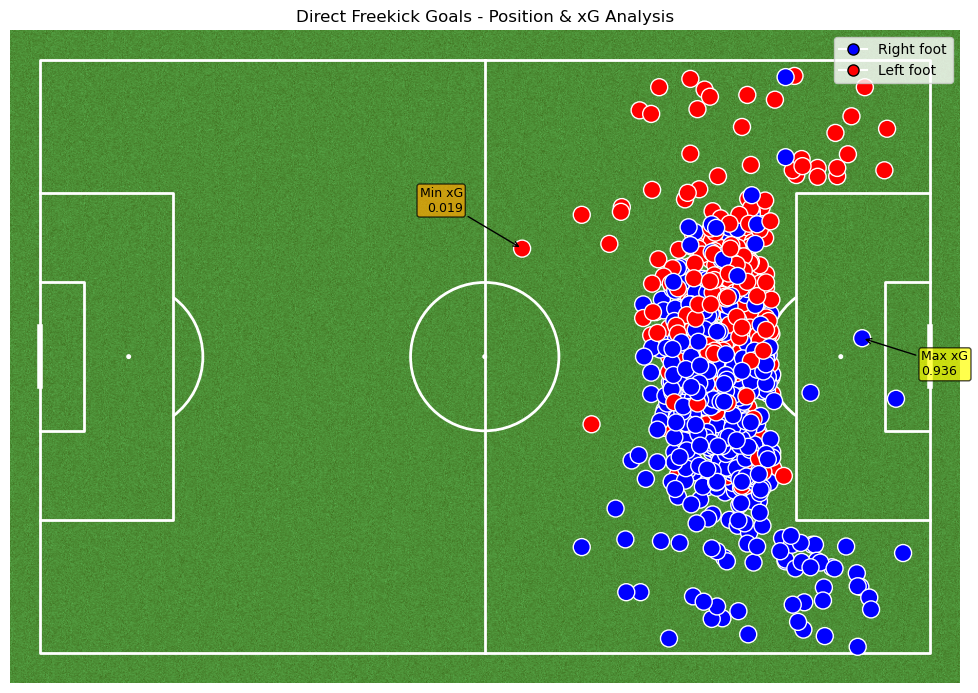

In [ ]:
# IMPORT LIBRARIES
# =====================================================
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm
import pandas as pd
import seaborn as sns  


# =====================================================
# LOAD DATA FILES
# =====================================================
# Load team statistics
teamstats = pd.read_csv("E:/teamstats.csv/teamstats.csv")
print("Team stats loaded:", teamstats.shape)
teamstats.head()

# Load player statistics (with special encoding for non-ASCII characters)
playerstats = pd.read_csv(r"E:\players.csv", encoding="latin-1")
print("Player stats loaded:", playerstats.shape)
playerstats.head()
playerstats.dropna()  # Remove rows with missing values (doesn't modify original)

# Load shot data
shots = pd.read_csv("E:/shots.csv/shots.csv")
print("Shots data loaded:", shots.shape)
shots.head()
shots.dropna()  # Remove rows with missing values
shots.drop_duplicates()  # Remove duplicate shots


# =====================================================
# EXPLORE SHOT DATA
# =====================================================
print("Unique shot results:", shots['shotResult'].unique())
print("Unique last actions:", shots['lastAction'].unique())

# Filter only successful GOALS
goals = shots[shots['shotResult'] == 'Goal']
print("Total goals found:", len(goals))
goals.head()

# Check goal situations
print("Goal situations:\n", goals['situation'].value_counts())

# Filter Direct Freekick goals only
fk = goals[goals['situation'] == 'DirectFreekick']
print("Direct Freekick goals:", len(fk))
fk.head()
print("Shot types in FK goals:\n", fk['shotType'].value_counts())


# =====================================================
# INSTALL & IMPORT PITCH LIBRARY (if needed)
# =====================================================
# !pip install mplsoccer  # Run once to install

from mplsoccer import Pitch


# =====================================================
# CREATE PITCH PLOT WITH GOALS
# =====================================================
# Create StatsBomb-style football pitch (coordinates: 0-120 x, 0-80 y)
pitch = Pitch(pitch_type='statsbomb',
              pitch_color='grass', 
              line_color='white')

# Create figure and draw pitch
fig, ax = pitch.draw(figsize=(10, 7))


# =====================================================
# PREPARE DATA FOR PLOTTING
# =====================================================
# Color mapping: RightFoot=blue, LeftFoot=red
color_map = {'RightFoot': 'blue', 'LeftFoot': 'red'}
colors = fk['shotType'].map(color_map)

# Scale position coordinates from 0-1 to pitch size (0-120, 0-80)
x = fk['positionX'] * 120
y = fk['positionY'] * 80


# =====================================================
# PLOT GOALS ON PITCH
# =====================================================
# Line connecting goals in order (commented out)
# pitch.plot(x, y, ax=ax, color='gray', linewidth=1, alpha=0.6)

# Scatter plot: goals as colored dots
pitch.scatter(x, y, ax=ax,
              c=colors,
              s=150,              # Marker size
              edgecolors='white', # White outline
              zorder=3)           # Draw on top


# =====================================================
# ADD LEGEND
# =====================================================
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Right foot',
           markerfacecolor='blue', markeredgecolor='black', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Left foot',
           markerfacecolor='red', markeredgecolor='black', markersize=8),
]
ax.legend(handles=legend_elements, loc='upper right')


# =====================================================
# FIND MAX/MIN xG GOALS
# =====================================================
# Get row indices of highest/lowest expected goals (xG)
idx_max = fk['xGoal'].idxmax()
idx_min = fk['xGoal'].idxmin()

# Extract those rows and scale their positions
row_max = fk.loc[idx_max]
row_min = fk.loc[idx_min]
x_max = row_max['positionX'] * 120
y_max = row_max['positionY'] * 80
x_min = row_min['positionX'] * 120
y_min = row_min['positionY'] * 80

print(f"Max xG: {row_max['xGoal']:.3f} at ({x_max:.1f}, {y_max:.1f})")
print(f"Min xG: {row_min['xGoal']:.3f} at ({x_min:.1f}, {y_min:.1f})")


# =====================================================
# ADD MAX/MIN xG ANNOTATIONS WITH ARROWS
# =====================================================
# Highlight MAX xG (yellow box)
pitch.annotate(f"Max xG\n{row_max['xGoal']:.3f}",
               (x_max, y_max),           # Point to this location
               ax=ax,
               xytext=(x_max + 8, y_max + 5),  # Text offset
               textcoords='data',
               arrowprops=dict(arrowstyle="->", color='black', lw=1),
               fontsize=9,
               bbox=dict(boxstyle="round,pad=0.2", facecolor="yellow", alpha=0.7),
               ha='left')

# Highlight MIN xG (orange box)  
pitch.annotate(f"Min xG\n{row_min['xGoal']:.3f}",
               (x_min, y_min),
               ax=ax,
               xytext=(x_min - 8, y_min - 5),
               textcoords='data',
               arrowprops=dict(arrowstyle="->", color='black', lw=1),
               fontsize=9,
               bbox=dict(boxstyle="round,pad=0.2", facecolor="orange", alpha=0.7),
               ha='right')


# =====================================================
# FINALIZE & DISPLAY PLOT
# =====================================================
plt.title('Direct Freekick Goals - Position & xG Analysis')
plt.tight_layout()
plt.show()